# 데이터 수집

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [160]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/데이터마이닝/Team_Project/HomeC.csv",encoding='utf-8')

<ipython-input-160-fedfb5e0163b>:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/데이터마이닝/Team_Project/HomeC.csv",encoding='utf-8')


# 탐색적 데이터 분석 (EDA)

In [3]:
# 샘플, 변수 수 확인
print(df.shape)
df.head()

(503911, 32)


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
# 뒤에서 5행에 해당하는 데이터 확인
df.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# 모든 열에 대해 결측값 존재 여부 확인
print(df.isnull().sum()) # 존재하므로 제거 필요

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64


In [161]:
# 결측값 제거
df.dropna(axis=0, how='any', inplace=True)

In [8]:
# 중복 행 확인
df.duplicated().sum() # 0개

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]            5

In [10]:
import pandas as pd
# 최대 열 출력 수를 늘림
pd.set_option('display.max_columns', None)

# min과 max의 차이가 크지 않으므로 스케일링 안해도 될 것 같음, 그러나 temperature에서의 이상치 존재 확인 필요
df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,0.002755,0.007023,0.000009,0.058530,0.015642,0.010983,0.035313,0.076229,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,0.021860,0.076740,0.000010,0.202706,0.137841,0.098859,0.096056,0.128428,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,0.000500,0.000017,0.000000,0.029833,0.000983,0.003617,0.001483,0.003367,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,0.000667,0.000050,0.000017,0.031317,0.001000,0.004000,0.001617,0.004283,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,0.000750,0.000167,0.000017,0.032883,0.001017,0.004067,0.001750,0.083917,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,1.166583,2.262583,0.000183,7.027900,1.633017,1.929800,0.465217,0.613883,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [7]:
# 칼럼 정보 확인
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [12]:
## (A)
# 각 변수의 고유값 개수 출력
for col in df.columns:
  values = df[col].nunique()
  print(f"{col}: {values}")



# 최대 행 출력 수를 늘림
pd.set_option('display.max_rows', None)

# 특정 칼럼의 샘플 확인
"""
df['icon'].value_counts() # 아이콘은 9개의 value ( 범주형 변수 )
df['cloudCover'].value_counts() # cloudCover는 수치형임을 확인
df['summary'].value_counts() # 18개의 고유값을 갖고 있는 범주형 변수
"""
df['cloudCover'].value_counts()

time: 503910
use [kW]: 130103
gen [kW]: 29904
House overall [kW]: 130103
Dishwasher [kW]: 9595
Furnace 1 [kW]: 28755
Furnace 2 [kW]: 28700
Home office [kW]: 23272
Fridge [kW]: 13986
Wine cellar [kW]: 10738
Garage door [kW]: 4567
Kitchen 12 [kW]: 2308
Kitchen 14 [kW]: 7466
Kitchen 38 [kW]: 9
Barn [kW]: 19906
Well [kW]: 6329
Microwave [kW]: 4386
Living room [kW]: 7342
Solar [kW]: 29904
temperature: 5063
icon: 9
humidity: 86
visibility: 705
summary: 18
apparentTemperature: 5295
pressure: 3017
windSpeed: 1671
cloudCover: 118
windBearing: 360
precipIntensity: 433
dewPoint: 4931
precipProbability: 85


,count
cloudCover,
0.0,63596
0.31,48101
1.0,47255
0.03,33186
0.04,23711
0.07,17995
0.08,17183
0.05,17146
0.06,13645


In [162]:
# 수치형 제외한 값들은 제외
df['cloudCover'] = pd.to_numeric(df['cloudCover'], errors='coerce')

# 최대 행 출력 수를 늘림
pd.set_option('display.max_rows', None)
df['cloudCover'].value_counts()

,count
cloudCover,
0.00,68236
0.31,49899
1.00,48705
0.03,33940
0.04,24117
0.07,18227
0.05,17494
0.08,17299
0.09,13955


In [163]:
# 결측값 제거 ( cloudCover 변수의 일부 값들 지워서 발생한 결측값 )
df.dropna(axis=0, how='any', inplace=True)

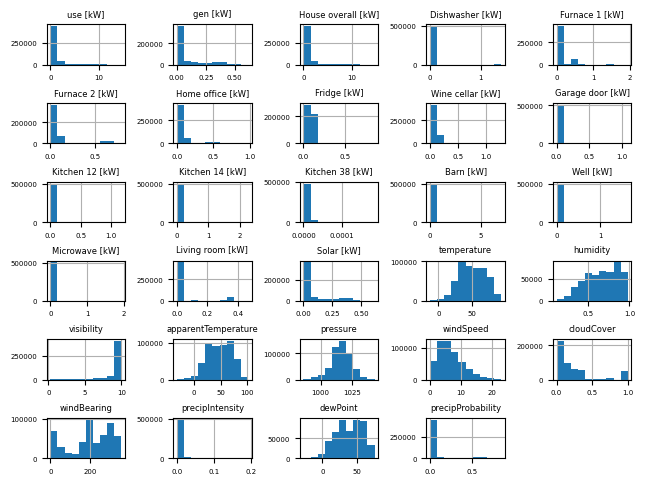

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=5)
df.iloc[:,:].hist()
plt.tight_layout()

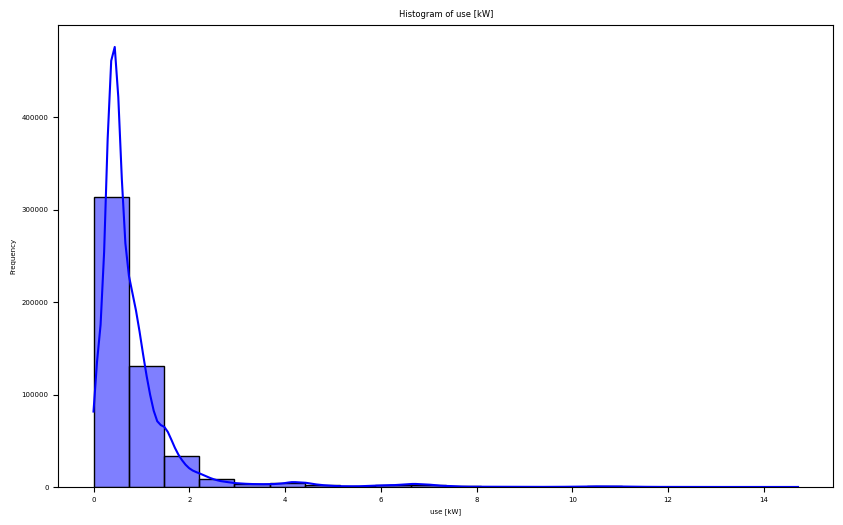

In [16]:
# 타겟 변수( use [kW] 의 히스토그램 분포 확인 )
plt.figure(figsize=(10, 6))
sns.histplot(df['use [kW]'], bins=20, kde=True, color='blue')

plt.title('Histogram of use [kW]')
plt.xlabel('use [kW]')
plt.ylabel('Frequency')

plt.show()

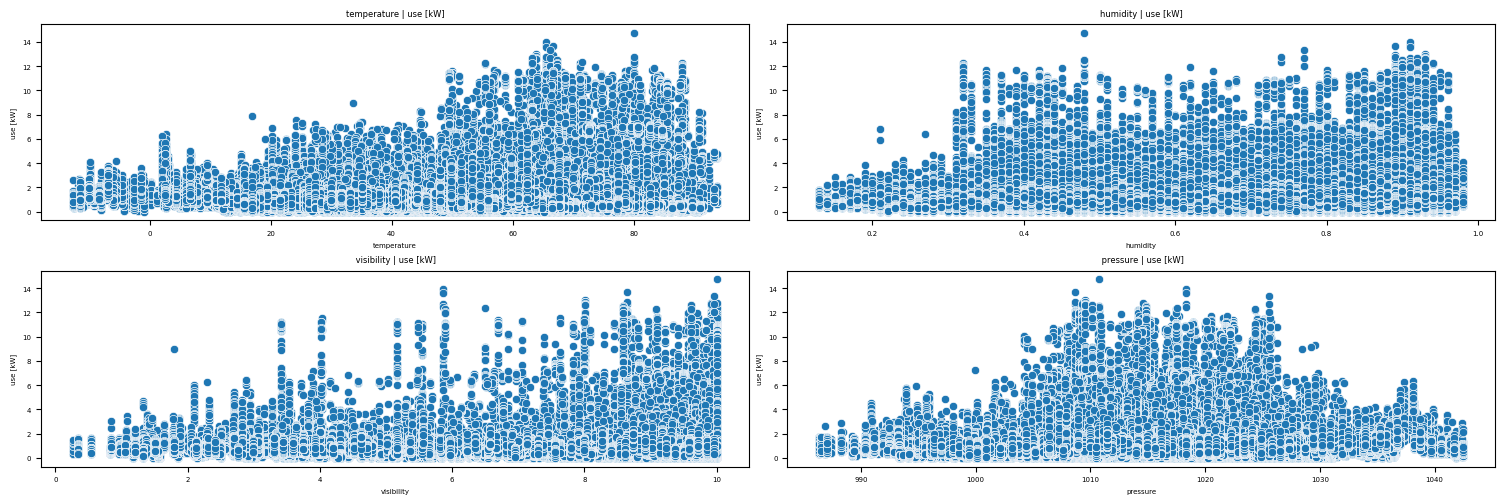

In [17]:
# 타겟 변수(use [kW])와 기상 정보들 간 상관관계를 알기 위한 산점도 그래프
plt.figure(figsize=(15, 5))

# 산점도 그래프: temperature vs use [kW]
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='temperature', y='use [kW]')
plt.title('temperature | use [kW]')
plt.xlabel('temperature')
plt.ylabel('use [kW]')

# 산점도 그래프: humidity vs use [kW]
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='humidity', y='use [kW]')
plt.title('humidity | use [kW]')
plt.xlabel('humidity')
plt.ylabel('use [kW]')

# 산점도 그래프 : visibility vs use [kW]
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='visibility', y='use [kW]')
plt.title(' visibility | use [kW]')
plt.xlabel('visibility')
plt.ylabel('use [kW]')

# 산점도 그래프 : pressure vs use [kW]
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='pressure', y='use [kW]')
plt.title(' pressure | use [kW]')
plt.xlabel('pressure')
plt.ylabel('use [kW]')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

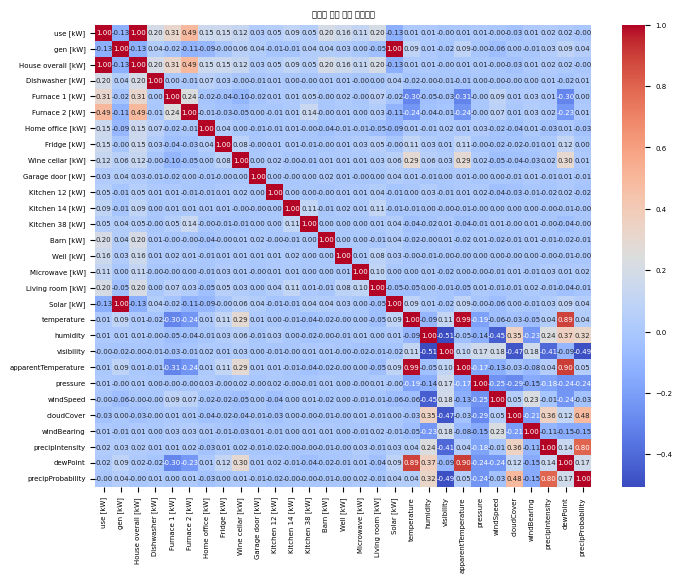

In [18]:
# 문자열 열을 제외한 수치형 변수들의 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('수치형 변수 간의 상관관계')
plt.show()

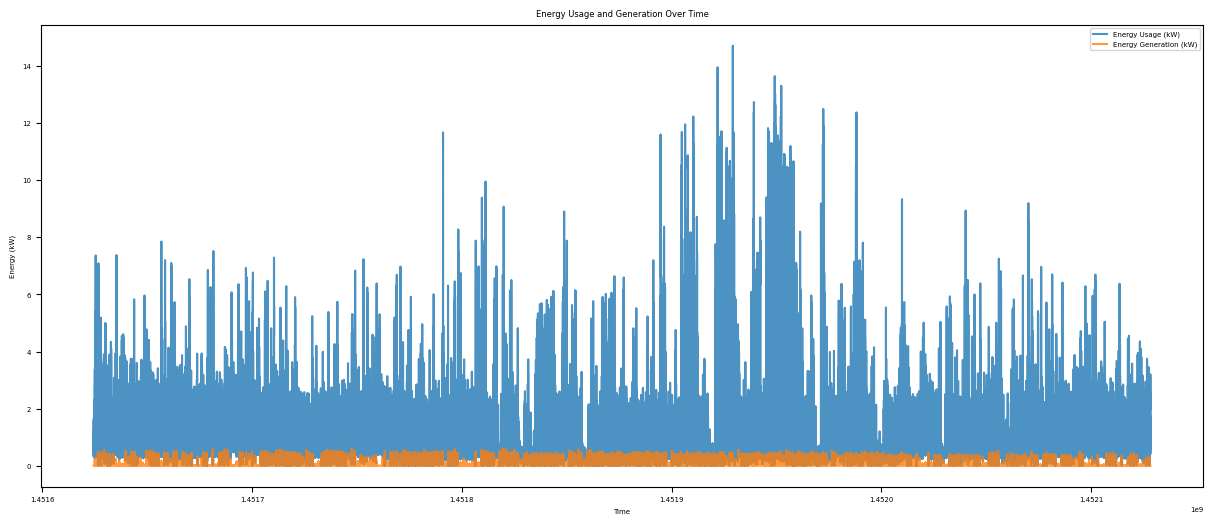

In [20]:
# 시간 경과에 따른 에너지 사용량 및 발전량
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['use [kW]'], label='Energy Usage (kW)', alpha=0.8)
plt.plot(df['time'], df['gen [kW]'], label='Energy Generation (kW)', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Energy (kW)')
plt.title('Energy Usage and Generation Over Time')
plt.legend()
plt.show()

# 데이터 전처리

##  특성 엔지니어링

In [164]:
from datetime import datetime

# UNIX 타임스탬프인 경우 'time' 열을 날짜/시간 형식으로 변환
df['time'] = pd.to_datetime(df['time'], unit='s', errors='coerce')

# 추가적인 시간 기반 특성 생성
df['hour'] = df['time'].dt.hour  # 시간 추출
df['day_of_week'] = df['time'].dt.dayofweek  # 요일 추출 (0=월요일, 6=일요일)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 주말 여부 (1=주말, 0=평일)
df['month'] = df['time'].dt.month  # 월 추출
df['season'] = df['month'].apply(lambda x: (x % 12 + 3) // 3)  # 월을 계절로 매핑 (1=겨울, ..., 4=가을)

# 상호작용 항목 또는 엔지니어링된 특성 생성 (예: 날씨와 에너지 패턴의 상호작용)
df['temp_humidity_interaction'] = df['temperature'] * df['humidity']  # 온도와 습도의 상호작용

# 특성 엔지니어링 이후 특성(컬럼) 개수 계산
feature_count = len(df.columns)

# 새로 생성된 특성에 대한 요약
engineered_features_summary = {
    "new_columns": ['hour', 'day_of_week', 'is_weekend', 'month', 'season', 'temp_humidity_interaction'],  # 새로 생성된 컬럼
    "total_features_after_engineering": feature_count  # 엔지니어링 이후 총 컬럼 개수
}

engineered_features_summary

<ipython-input-164-e81eb7844937>:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['time'], unit='s', errors='coerce')


{'new_columns': ['hour',
  'day_of_week',
  'is_weekend',
  'month',
  'season',
  'temp_humidity_interaction'],
 'total_features_after_engineering': 38}

In [165]:
# 더 많은 엔지니어링된 특성 추가하여 총 특성 개수 증가

# 'use [kW]'와 'gen [kW]'에 대해 과거 트렌드를 반영하기 위한 lag 특성 생성
df['use_lag_1'] = df['use [kW]'].shift(1)  # 1단계 이전 값
df['use_lag_2'] = df['use [kW]'].shift(2)  # 2단계 이전 값
df['gen_lag_1'] = df['gen [kW]'].shift(1)  # 1단계 이전 값
df['gen_lag_2'] = df['gen [kW]'].shift(2)  # 2단계 이전 값

# 에너지 사용 및 발전 트렌드의 과거 데이터를 평활화하기 위한 이동 평균(rolling average) 생성
df['use_rolling_mean_3'] = df['use [kW]'].rolling(window=3).mean()  # 3단계 이동 평균
df['gen_rolling_mean_3'] = df['gen [kW]'].rolling(window=3).mean()  # 3단계 이동 평균

# 변수 간의 비율 및 차이를 계산하여 추가 특성 생성
df['use_gen_ratio'] = df['use [kW]'] / (df['gen [kW]'] + 1e-6)  # 0으로 나누는 것을 방지하기 위해 작은 값을 더함
df['temp_pressure_diff'] = df['temperature'] - df['pressure']  # 온도와 기압의 차이

# 추가적인 특성 엔지니어링 이후 총 특성(컬럼) 개수 계산
final_feature_count = len(df.columns)

# 업데이트된 특성 요약
updated_features_summary = {
    "total_features_after_engineering": final_feature_count,  # 엔지니어링 이후 총 특성 개수
    "new_features_added": [  # 새로 추가된 특성
        'use_lag_1', 'use_lag_2', 'gen_lag_1', 'gen_lag_2',
        'use_rolling_mean_3', 'gen_rolling_mean_3',
        'use_gen_ratio', 'temp_pressure_diff',
        'icon_*', 'summary_*', 'season_*'
    ]
}

updated_features_summary

{'total_features_after_engineering': 46,
 'new_features_added': ['use_lag_1',
  'use_lag_2',
  'gen_lag_1',
  'gen_lag_2',
  'use_rolling_mean_3',
  'gen_rolling_mean_3',
  'use_gen_ratio',
  'temp_pressure_diff',
  'icon_*',
  'summary_*',
  'season_*']}

In [24]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,hour,day_of_week,is_weekend,month,season,temp_humidity_interaction,use_lag_1,use_lag_2,gen_lag_1,gen_lag_2,use_rolling_mean_3,gen_rolling_mean_3,use_gen_ratio,temp_pressure_diff
58,2016-01-01 05:00:58,0.714200,0.003417,0.714200,0.000033,0.021083,0.309983,0.043067,0.005167,0.123317,0.013183,0.000667,0.000050,0.000017,0.031750,0.001000,0.004233,0.001633,0.003417,35.87,partly-cloudy-night,0.61,10.0,Mostly Cloudy,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,1,1,21.8807,NaN,NaN,NaN,NaN,NaN,NaN,208.972963,-980.38
59,2016-01-01 05:00:59,0.497067,0.003417,0.497067,0.000017,0.096983,0.062867,0.043283,0.005000,0.123283,0.012883,0.000750,0.000067,0.000017,0.031783,0.001017,0.004233,0.001700,0.003417,35.87,partly-cloudy-night,0.61,10.0,Mostly Cloudy,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,1,1,21.8807,0.714200,NaN,0.003417,NaN,NaN,NaN,145.440345,-980.38
60,2016-01-01 05:01:00,0.465133,0.003450,0.465133,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,0.012950,0.000717,0.000083,0.000017,0.031800,0.001000,0.004233,0.001633,0.003450,35.87,partly-cloudy-night,0.61,10.0,Mostly Cloudy,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,1,1,21.8807,0.497067,0.714200,0.003417,0.003417,0.558800,0.003428,134.782189,-980.38
61,2016-01-01 05:01:01,0.512933,0.003417,0.512933,0.000017,0.111333,0.063883,0.043300,0.004967,0.123867,0.012883,0.000733,0.000083,0.000017,0.031817,0.001017,0.004233,0.001683,0.003417,35.87,partly-cloudy-night,0.61,10.0,Mostly Cloudy,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,1,1,21.8807,0.465133,0.497067,0.003450,0.003417,0.491711,0.003428,150.082888,-980.38
62,2016-01-01 05:01:02,0.651283,0.003417,0.651283,0.000017,0.114583,0.063200,0.043283,0.114167,0.124267,0.012917,0.000467,0.000033,0.000000,0.031800,0.001000,0.004233,0.001667,0.003417,35.87,partly-cloudy-night,0.61,10.0,Mostly Cloudy,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,1,1,21.8807,0.512933,0.465133,0.003417,0.003450,0.543117,0.003428,190.563719,-980.38


### 특성 엔지니어링 이후 간단한 EDA

In [ ]:
# 각 변수의 고유값 개수 출력
for col in df.columns:
  values = df[col].nunique()
  print(f"{col}: {values}")



# 최대 행 출력 수를 늘림
pd.set_option('display.max_rows', None)

df.columns

time: 503852
use [kW]: 130091
gen [kW]: 29904
House overall [kW]: 130091
Dishwasher [kW]: 9595
Furnace 1 [kW]: 28753
Furnace 2 [kW]: 28697
Home office [kW]: 23252
Fridge [kW]: 13986
Wine cellar [kW]: 10737
Garage door [kW]: 4567
Kitchen 12 [kW]: 2308
Kitchen 14 [kW]: 7466
Kitchen 38 [kW]: 9
Barn [kW]: 19905
Well [kW]: 6329
Microwave [kW]: 4384
Living room [kW]: 7342
Solar [kW]: 29904
temperature: 5063
icon: 9
humidity: 86
visibility: 705
summary: 18
apparentTemperature: 5295
pressure: 3017
windSpeed: 1671
cloudCover: 77
windBearing: 360
precipIntensity: 433
dewPoint: 4930
precipProbability: 85
hour: 24
day_of_week: 7
is_weekend: 2
month: 1
season: 1
temp_humidity_interaction: 8550
use_lag_1: 130091
use_lag_2: 130091
gen_lag_1: 29904
gen_lag_2: 29904
use_rolling_mean_3: 497984
gen_rolling_mean_3: 279041
use_gen_ratio: 492723
temp_pressure_diff: 6376


Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'hour', 'day_of_week', 'is_weekend',
       'month', 'season', 'temp_humidity_interaction', 'use_lag_1',
       'use_lag_2', 'gen_lag_1', 'gen_lag_2', 'use_rolling_mean_3',
       'gen_rolling_mean_3', 'use_gen_ratio', 'temp_pressure_diff'],
      dtype='object')

In [166]:
drop_columns = ['season','month','time','House overall [kW]'] # 다 1이라서 의미 없는 변수 & House overall [kW]은 타겟변수와 같은 변수이므로 삭제

df.drop(columns=drop_columns, inplace=True)

In [96]:
# 모든 열에 대해 결측값 존재 여부 확인
print(df.isnull().sum())

use [kW]                     0
gen [kW]                     0
Dishwasher [kW]              0
Furnace 1 [kW]               0
Furnace 2 [kW]               0
Home office [kW]             0
Fridge [kW]                  0
Wine cellar [kW]             0
Garage door [kW]             0
Kitchen 12 [kW]              0
Kitchen 14 [kW]              0
Kitchen 38 [kW]              0
Barn [kW]                    0
Well [kW]                    0
Microwave [kW]               0
Living room [kW]             0
Solar [kW]                   0
temperature                  0
icon                         0
humidity                     0
visibility                   0
summary                      0
apparentTemperature          0
pressure                     0
windSpeed                    0
cloudCover                   0
windBearing                  0
precipIntensity              0
dewPoint                     0
precipProbability            0
hour                         0
day_of_week                  0
is_weeke

In [167]:
# 결측값 제거
df.dropna(axis=0, how='any', inplace=True)

In [31]:
# 중복 행 확인
df.duplicated().sum() # 149개

149

In [168]:
# 중복 데이터 제거
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### 차원 축소 ( T-SNE ) 기반 EDA

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


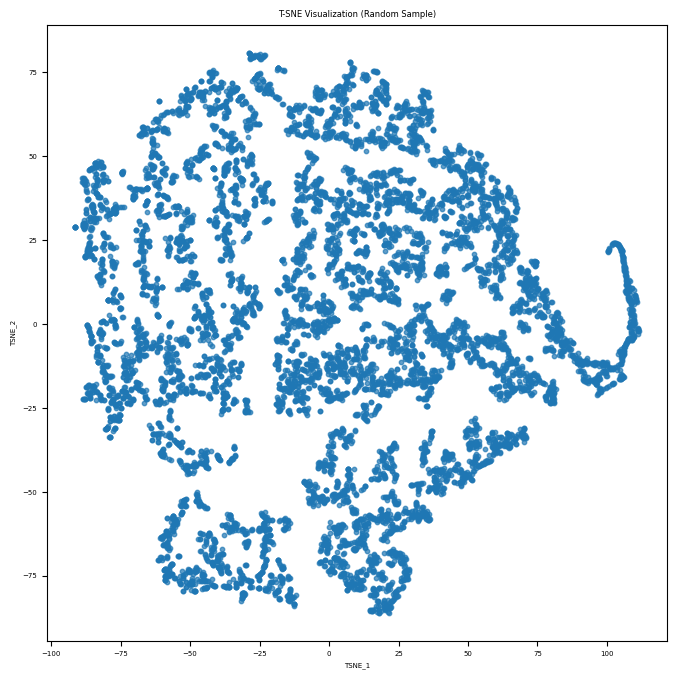

In [68]:
# 전체 데이터는 너무 오래 걸려서 10000개로만 차원 축소 진행

from sklearn.manifold import TSNE

# 데이터에서 랜덤으로 10,000개 샘플 추출
sample_size = 10000
random_sample = df.sample(n=sample_size, random_state=42)  # 랜덤 추출

numeric_sample = random_sample.select_dtypes(include=['float64', 'int64'])
numeric_sample = numeric_sample.dropna()

# T-SNE 모델 생성 및 수행
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(numeric_sample)

# 결과를 DataFrame으로 저장
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE_1', 'TSNE_2'])

# T-SNE 결과 시각화
plt.figure(figsize=(8, 8))
plt.scatter(tsne_df['TSNE_1'], tsne_df['TSNE_2'], s=10, alpha=0.7)
plt.title('T-SNE Visualization (Random Sample)')
plt.xlabel('TSNE_1')
plt.ylabel('TSNE_2')
plt.show()

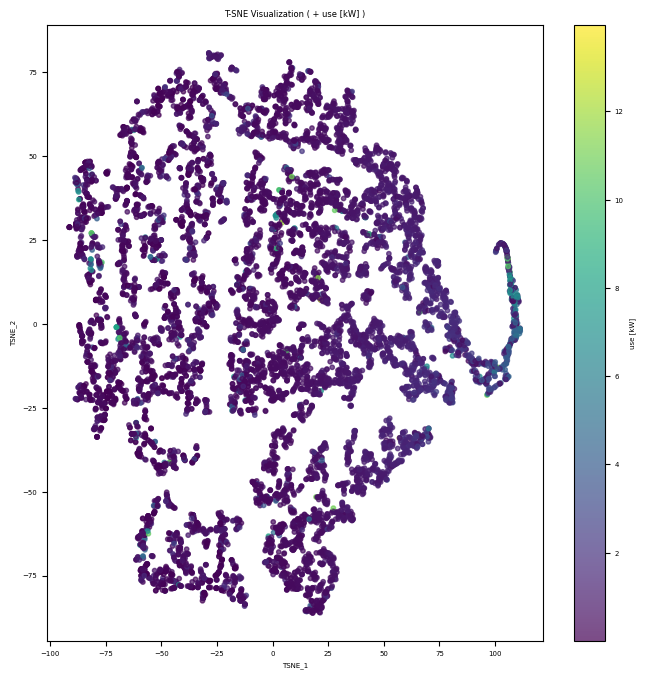

In [69]:
# T-SNE 결과에 타겟 값 추가
tsne_df['use_kW'] = df.loc[random_sample.index, 'use [kW]'].reset_index(drop=True)

# T-SNE 시각화 (타겟 값 매핑)
plt.figure(figsize=(8, 8))
plt.scatter(tsne_df['TSNE_1'], tsne_df['TSNE_2'], c=tsne_df['use_kW'], cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label='use [kW]')
plt.title('T-SNE Visualization ( + use [kW] )')
plt.xlabel('TSNE_1')
plt.ylabel('TSNE_2')
plt.show()


## 범주형 변수 인코딩 방식 및 비교

### One-Hot Encoding + Target Encoding

In [99]:
# 전처리 1번 : One-Hot Encoding + Target Encoding
df_1 = df.copy()

In [100]:
dummies = pd.get_dummies(df_1['icon'], prefix='icon')

df_1 = df_1.drop(columns=['icon'])
df_1 = pd.concat([df_1, dummies], axis=1)
print("data: ", df_1.shape)

data:  (503701, 50)


In [34]:
# Target encoding 위한 라이브러리
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


In [101]:
from category_encoders import TargetEncoder

# 타겟 변수
target = 'use [kW]'

# 타겟 인코딩할 변수 리스트
target_list = [ 'summary']

# 타겟 인코딩 객체 생성
encoder = TargetEncoder(cols=target_list)

# 타겟 인코딩 수행
df_1 = encoder.fit_transform(df_1, df_1[target])

print(df_1.head())

    use [kW]  gen [kW]  Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  \
60  0.465133  0.003450         0.000017        0.064500        0.062633   
61  0.512933  0.003417         0.000017        0.111333        0.063883   
62  0.651283  0.003417         0.000017        0.114583        0.063200   
63  0.710450  0.003433         0.000050        0.142050        0.062783   
64  1.195683  0.003400         0.000267        0.502567        0.062733   

    Home office [kW]  Fridge [kW]  Wine cellar [kW]  Garage door [kW]  \
60          0.043250     0.005017          0.123350          0.012950   
61          0.043300     0.004967          0.123867          0.012883   
62          0.043283     0.114167          0.124267          0.012917   
63          0.043283     0.140700          0.124317          0.012867   
64          0.043600     0.137517          0.123750          0.012017   

    Kitchen 12 [kW]  Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  \
60         0.000717         0.0

In [182]:
df = df_1

In [ ]:
# onehot & target 인코딩
df.to_csv("/content/drive/MyDrive/데이터마이닝/Team_Project/HomeC_TargetEncoding.csv", index=False, encoding='cp949')

### One-Hot Encoding + Hash Encoding

In [169]:
# 전처리 2번 : One-Hot Encoding + Hash Encoding
df_2 = df.copy()

In [170]:
dummies = pd.get_dummies(df_2['icon'], prefix='icon')

df_2 = df_2.drop(columns=['icon'])
df_2 = pd.concat([df_2, dummies], axis=1)
print("data: ", df_2.shape)

data:  (503701, 50)


In [ ]:
!pip install category_encoders

In [171]:
from category_encoders import HashingEncoder

# 해시 인코딩할 변수 리스트
target_list = ['summary']

# 해시 인코딩 객체 생성
encoder = HashingEncoder(cols=target_list, n_components=8)  # n_components

# 해시 인코딩 수행
df_2 = encoder.fit_transform(df_2)

# 결과 출력
print(df_2.head())

    col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  use [kW]  \
60      0      0      1      0      0      0      0      0  0.465133   
61      0      0      1      0      0      0      0      0  0.512933   
62      0      0      1      0      0      0      0      0  0.651283   
63      0      0      1      0      0      0      0      0  0.710450   
64      0      0      1      0      0      0      0      0  1.195683   

    gen [kW]  Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  \
60  0.003450         0.000017        0.064500        0.062633   
61  0.003417         0.000017        0.111333        0.063883   
62  0.003417         0.000017        0.114583        0.063200   
63  0.003433         0.000050        0.142050        0.062783   
64  0.003400         0.000267        0.502567        0.062733   

    Home office [kW]  Fridge [kW]  Wine cellar [kW]  Garage door [kW]  \
60          0.043250     0.005017          0.123350          0.012950   
61          0.043300     0.004

In [172]:
df=df_2

In [ ]:
# onehot & hash 인코딩 했으면 얘 실행! (주소는 변경해도돼요)
df.to_csv("/content/drive/MyDrive/데이터마이닝/Team_Project/HomeC_HashEncoding.csv", index=False, encoding='cp949')

## 차원축소

In [70]:
!pip install lime

In [71]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(
        X.values, i) for i in range(X.shape[1])]
    return vif_data


def vif_selection(X, y, max_vif_for_calculate=100.0, want_max_vif=15.0):
    features = list(X.columns)
    selected_features = []

    correlations_with_y = abs(X.corrwith(y))

    correlation_matrix = X[features].corr().abs()
    mean_correlation = correlation_matrix.mean()
    weighted_correlation = mean_correlation * (1 - correlations_with_y)
    first_feature = weighted_correlation.idxmin()
    selected_features.append(first_feature)
    features.remove(first_feature)

    while len(features) > 0:
        min_score = float('inf')
        feature_to_add = None

        for feature in features:
            temp_features = selected_features + [feature]
            X_temp = X[temp_features]
            vif_data = calculate_vif(X_temp)
            max_vif = vif_data['VIF'].max()

            score = (max_vif / max_vif_for_calculate) / \
                (correlations_with_y[feature] + 0.01)

            print(f"|     | VIF: {max_vif:.4f} | Corr: {correlations_with_y[feature]:.4f} | Score: {score:.4f} | {feature}")

            if score < min_score:
                min_score = score
                feature_to_add = feature

        if max_vif < max_vif_for_calculate:
            selected_features.append(feature_to_add)
            features.remove(feature_to_add)
            print(f"| add | {feature_to_add} (Score: {min_score:.4f}, Correlation with y: {correlations_with_y[feature_to_add]:.4f})")
        else:
            break

    print("|")
    print("|=========================================")
    print("|                  del                   |")

    while True:
        X_current = X[selected_features]
        current_vif = calculate_vif(X_current)
        max_current_vif = current_vif['VIF'].max()

        if max_current_vif <= want_max_vif:
            break

        print(current_vif.sort_values('VIF', ascending=False))

        max_vif_reduction = 0
        feature_to_remove = None

        for feature in selected_features:
            temp_features = [f for f in selected_features if f != feature]
            X_temp = X[temp_features]
            temp_vif = calculate_vif(X_temp)

            current_vif_sum = current_vif['VIF'].sum()
            temp_vif_sum = temp_vif['VIF'].sum()
            vif_reduction = current_vif_sum - temp_vif_sum

            print(f"\n| del | {feature}:")
            print("| new vif |")
            print(temp_vif.sort_values('VIF', ascending=False))
            print(f"total vif reduction: {vif_reduction:.4f}")

            if vif_reduction > max_vif_reduction:
                max_vif_reduction = vif_reduction
                feature_to_remove = feature

        if feature_to_remove:
            selected_features.remove(feature_to_remove)
            print(f"\n| del | {feature_to_remove} (Total VIF reduction: {max_vif_reduction:.4f})")
            print("|=========================================")

    X_selected = X[selected_features]
    final_vif = calculate_vif(X_selected)

    print("\ngood!")

    return X_selected, final_vif


#df = scaled_df

# Load the original DataFrame with all columns
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/HomeC_TargetEncoding.csv')

# Now proceed with scaling the 'gen [kW]' column
# ... (your scaling code from cells 38-40) ...

# Perform the drop operation
x = df.drop(columns=['use [kW]'] + [col for col in df.columns if 'kw' in col.lower()] + ["use_rolling_mean_3"])
y = df['use [kW]']


numeric_cols = x.select_dtypes(include=['float64', 'int64']).columns
x_numeric = x[numeric_cols]

vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(
    x_numeric.values, i) for i in range(x_numeric.shape[1])]

X_selected, final_vif = vif_selection(
    x_numeric, y, max_vif_for_calculate=100.0, want_max_vif=15.0)

print("")
print(final_vif.sort_values('VIF', ascending=False))

df_target = pd.read_csv("/content/drive/MyDrive/데이터마이닝/Team_Project/HomeC_TargetEncoding.csv",encoding='utf-8')

exclude_columns = ['use [kW]', 'is_weekday', 'use_rolling_mean_3']
exclude_columns.extend(
    [col for col in df_target.columns if 'kw' in col.lower()])

target_only_columns = [col for col in df_target.columns
                       if col not in df.columns
                       and col not in exclude_columns]

X_final = pd.concat([X_selected, df_target[target_only_columns]], axis=1)

print(target_only_columns)

In [183]:
df[df.select_dtypes(include=['bool']).columns] = df.select_dtypes(include=['bool']).astype(int)

In [184]:
# 차원 축소 이후에 정성적 분석과 정량적 분석을 통해 기상변수 추가
X = df[['day_of_week', 'is_weekend', 'use_lag_1', 'use_lag_2', 'gen_lag_1', 'windSpeed', 'precipIntensity',
        'use_gen_ratio', 'gen_rolling_mean_3', 'temperature','humidity','icon_snow','icon_clear-day','temp_pressure_diff']]
y = df['use [kW]']

# 데이터 모델링

## One-Hot & Target Encoding + PCA 적용 X

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import root_mean_squared_error, make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import lime
import lime.lime_tabular
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from multiprocessing import Pool
import numpy as np
import logging
from sklearn.model_selection import KFold
import shap

In [185]:
# train, validation, test data로 구분
if len(X) > len(y):
    X = X.iloc[:-1]
elif len(y) > len(X):
    y = y.iloc[:-1]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=0)

print(X_train.shape, X_val.shape, X_test.shape)

(352590, 14) (75555, 14) (75556, 14)


In [46]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.3 MB/s eta 0:00:00


In [106]:
from skopt import BayesSearchCV
from skopt.space import Real
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score
from skopt.space import Real, Categorical, Integer

In [156]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
import pandas as pd

# 모델 학습 (하이퍼파라미터 튜닝 없이 기본 설정 사용)
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elastic_model = ElasticNet()
bayesian_ridge_model = BayesianRidge()

# 모델 학습
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_model.fit(X_train, y_train)
bayesian_ridge_model.fit(X_train, y_train)

# 예측값 생성
linear_predicted_value = linear_model.predict(X_test)
lasso_predicted_value = lasso_model.predict(X_test)
ridge_predicted_value = ridge_model.predict(X_test)
elastic_predicted_value = elastic_model.predict(X_test)
bayesian_ridge_predicted_value = bayesian_ridge_model.predict(X_test)

# 평가 지표 계산 함수
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mae, mse, medae, evs

# 평가 지표 계산 및 출력
n = df.shape[1]
p = X_test.shape[1]

# Linear 모델 평가
linear_r2 = r2_score(y_test, linear_predicted_value)
linear_adj_r2 = 1 - (1 - linear_r2) * (n - 1) / (n - p - 1)
linear_mae, linear_mse, linear_medae, linear_evs = evaluate_metrics(y_test, linear_predicted_value)

# Lasso 모델 평가
lasso_r2 = r2_score(y_test, lasso_predicted_value)
lasso_adj_r2 = 1 - (1 - lasso_r2) * (n - 1) / (n - p - 1)
lasso_mae, lasso_mse, lasso_medae, lasso_evs = evaluate_metrics(y_test, lasso_predicted_value)

# Ridge 모델 평가
ridge_r2 = r2_score(y_test, ridge_predicted_value)
ridge_adj_r2 = 1 - (1 - ridge_r2) * (n - 1) / (n - p - 1)
ridge_mae, ridge_mse, ridge_medae, ridge_evs = evaluate_metrics(y_test, ridge_predicted_value)

# ElasticNet 모델 평가
elastic_r2 = r2_score(y_test, elastic_predicted_value)
elastic_adj_r2 = 1 - (1 - elastic_r2) * (n - 1) / (n - p - 1)
elastic_mae, elastic_mse, elastic_medae, elastic_evs = evaluate_metrics(y_test, elastic_predicted_value)

# Bayesian Ridge 모델 평가
bayesianridge_r2 = r2_score(y_test, bayesian_ridge_predicted_value)
bayesianridge_adj_r2 = 1 - (1 - bayesianridge_r2) * (n - 1) / (n - p - 1)
bayesian_ridge_mae, bayesian_ridge_mse, bayesian_ridge_medae, bayesian_ridge_evs = evaluate_metrics(y_test, bayesian_ridge_predicted_value)

# 결과 출력
print("============= linear ====================")
print(f"MAE: {linear_mae:.4f}")
print(f"MSE: {linear_mse:.4f}")
print(f"MedAE: {linear_medae:.4f}")
print(f"EVS: {linear_evs:.4f}")
print(f"R² Score: {linear_r2:.4f}")
print(f"Adjusted R² Score: {linear_adj_r2:.4f}")
print("Intercept:", linear_model.intercept_)
print("\n=========================================")

print("============= lasso ====================")
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"MedAE: {lasso_medae:.4f}")
print(f"EVS: {lasso_evs:.4f}")
print(f"R² Score: {lasso_r2:.4f}")
print(f"Adjusted R² Score: {lasso_adj_r2:.4f}")
print("Intercept:", lasso_model.intercept_)
print("\n=========================================")

print("============= ridge ====================")
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"MedAE: {ridge_medae:.4f}")
print(f"EVS: {ridge_evs:.4f}")
print(f"R² Score: {ridge_r2:.4f}")
print(f"Adjusted R² Score: {ridge_adj_r2:.4f}")
print("Intercept:", ridge_model.intercept_)
print("\n=========================================")

print("============= elastic ====================")
print(f"MAE: {elastic_mae:.4f}")
print(f"MSE: {elastic_mse:.4f}")
print(f"MedAE: {elastic_medae:.4f}")
print(f"EVS: {elastic_evs:.4f}")
print(f"R² Score: {elastic_r2:.4f}")
print(f"Adjusted R² Score: {elastic_adj_r2:.4f}")
print("Intercept:", elastic_model.intercept_)
print("\n=========================================")

print("============= BayesianRidge ====================")
print(f"MAE: {bayesian_ridge_mae:.4f}")
print(f"MSE: {bayesian_ridge_mse:.4f}")
print(f"MedAE: {bayesian_ridge_medae:.4f}")
print(f"EVS: {bayesian_ridge_evs:.4f}")
print(f"R² Score: {bayesianridge_r2:.4f}")
print(f"Adjusted R² Score: {bayesianridge_adj_r2:.4f}")
print("Intercept:", bayesian_ridge_model.intercept_)
print("\n=========================================")

============= linear ====================
MAE: 0.0787
MSE: 0.0148
MedAE: 0.0623
EVS: 0.7283
R² Score: 0.7283
Adjusted R² Score: 0.6196
Intercept: 0.6187988884170953

============= lasso ====================
MAE: 0.1874
MSE: 0.0532
MedAE: 0.1616
EVS: 0.0203
R² Score: 0.0203
Adjusted R² Score: -0.3716
Intercept: 0.0037827321463706487

============= ridge ====================
MAE: 0.0787
MSE: 0.0148
MedAE: 0.0623
EVS: 0.7282
R² Score: 0.7282
Adjusted R² Score: 0.6195
Intercept: 0.6192240309810035

============= elastic ====================
MAE: 0.1831
MSE: 0.0512
MedAE: 0.1569
EVS: 0.0580
R² Score: 0.0580
Adjusted R² Score: -0.3188
Intercept: 0.48884999242629723

============= BayesianRidge ====================
MAE: 0.0787
MSE: 0.0148
MedAE: 0.0623
EVS: 0.7283
R² Score: 0.7283
Adjusted R² Score: 0.6196
Intercept: 0.6188597968539218



In [186]:
print("|============ linear ==============")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("|")
print("|============ lasso ==============")
lasso_params = {
    'alpha': Real(0.01, 1),
    'max_iter': [100],
    'tol': [0.001]
}
lasso_bayes = BayesSearchCV(
    Lasso(),
    lasso_params,
    n_iter=10,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
lasso_bayes.fit(X_train, y_train)
lasso_model = lasso_bayes.best_estimator_
print("| lasso lambda:", lasso_bayes.best_params_['alpha'])
print("|")
print("|============ ridge ==============")
ridge_params = {
    'alpha': Real(0.01, 1),
    'max_iter': [100],
    'tol': [0.001]
}
ridge_bayes = BayesSearchCV(
    Ridge(),
    ridge_params,
    n_iter=10,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
ridge_bayes.fit(X_train, y_train)
ridge_model = ridge_bayes.best_estimator_
print("| ridge lambda:", ridge_bayes.best_params_['alpha'])
print("|")
print("|============ elastic ==============")

elastic_params = {
    'alpha': Real(0.01, 1),  # l1 + l2
    'l1_ratio': Real(0.01, 1),
    'max_iter': [1000],
    'tol': [0.001]
}
elastic_bayes = BayesSearchCV(
    ElasticNet(),
    elastic_params,
    n_iter=30,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
elastic_bayes.fit(X_train, y_train)
elastic_model = elastic_bayes.best_estimator_

l1_param = elastic_bayes.best_params_[
    'alpha'] * elastic_bayes.best_params_['l1_ratio']
l2_param = elastic_bayes.best_params_[
    'alpha'] * (1 - elastic_bayes.best_params_['l1_ratio'])

print("| elasticnet lambda (L1):", l1_param)
print("| elasticnet lambda (L2):", l2_param)
print("|")


print("|============ BayesianRidge ==============")
bayesian_ridge_params = {
    'alpha_1': Real(1e-6, 1e+1, prior='log-uniform'),
    'alpha_2': Real(1e-6, 1e+1, prior='log-uniform'),
    'lambda_1': Real(1e-6, 1e+1, prior='log-uniform'),
    'lambda_2': Real(1e-6, 1e+1, prior='log-uniform'),
    'fit_intercept': Categorical([True, False]),
    'max_iter': Integer(100, 1000),
    'tol': Real(1e-5, 1e-1, prior='log-uniform')
}

bayesian_ridge_bayes = BayesSearchCV(
    BayesianRidge(),
    bayesian_ridge_params,
    n_iter=20,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
bayesian_ridge_bayes.fit(X_train, y_train)

bayesian_ridge_model = bayesian_ridge_bayes.best_estimator_
print("| Best hyperparameters:", bayesian_ridge_bayes.best_params_)


|============ linear ==============
|
|============ lasso ==============
| lasso lambda: 0.1253129846023188
|
|============ ridge ==============
| ridge lambda: 0.1253129846023188
|
|============ elastic ==============
| elasticnet lambda (L1): 0.0001
| elasticnet lambda (L2): 0.0099
|
|============ BayesianRidge ==============
| Best hyperparameters: OrderedDict([('alpha_1', 2.548567650370125e-05), ('alpha_2', 8.932148806756544), ('fit_intercept', True), ('lambda_1', 1.1922109844300427e-06), ('lambda_2', 9.523074441169328), ('max_iter', 950), ('tol', 0.00014253295232217593)])


In [187]:
linear_predicted_value = linear_model.predict(X_test)
lasso_predicted_value = lasso_model.predict(X_test)
ridge_predicted_value = ridge_model.predict(X_test)
elastic_predicted_value = elastic_model.predict(X_test)
bayesian_ridge_predicted_value = bayesian_ridge_model.predict(X_test)


n = df.shape[1]
p = X_test.shape[1]

linear_r2 = r2_score(y_test, linear_predicted_value)
linear_adj_r2 = 1 - (1-linear_r2)*(n-1)/(n-p-1)

lasso_r2 = r2_score(y_test, lasso_predicted_value)
lasso_adj_r2 = 1 - (1-lasso_r2)*(n-1)/(n-p-1)

ridge_r2 = r2_score(y_test, ridge_predicted_value)
ridge_adj_r2 = 1 - (1-ridge_r2)*(n-1)/(n-p-1)

elastic_r2 = r2_score(y_test, elastic_predicted_value)
elastic_adj_r2 = 1 - (1-elastic_r2)*(n-1)/(n-p-1)

bayesianridge_r2 = r2_score(y_test, bayesian_ridge_predicted_value)
bayesianridge_adj_r2 = 1 - (1-bayesianridge_r2)*(n-1)/(n-p-1)

# 평가 지표 계산 함수
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mae, mse, medae, evs


coefficients1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_model.coef_
})
coefficients2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})
coefficients3 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_model.coef_
})
coefficients4 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': elastic_model.coef_
})

coefficients5 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': bayesian_ridge_model.coef_
})

print("============= linear ====================")
linear_mae, linear_mse, linear_medae, linear_evs = evaluate_metrics(y_test, linear_predicted_value)
print(f"MAE: {linear_mae:.4f}")
print(f"MSE: {linear_mse:.4f}")
print(f"MedAE: {linear_medae:.4f}")
print(f"EVS: {linear_evs:.4f}")
print(f"         R² Score: {linear_r2:.4f}")
print(f"Adjusted R² Score: {linear_adj_r2:.4f}")
print("         Intercept:", linear_model.intercept_)
print(coefficients1.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= lasso ====================")
lasso_mae, lasso_mse, lasso_medae, lasso_evs = evaluate_metrics(y_test, lasso_predicted_value)
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"MedAE: {lasso_medae:.4f}")
print(f"EVS: {lasso_evs:.4f}")
print(f"         R² Score: {lasso_r2:.4f}")
print(f"Adjusted R² Score: {lasso_adj_r2:.4f}")
print("         Intercept:", lasso_model.intercept_)
print(coefficients2.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= ridge ====================")
ridge_mae, ridge_mse, ridge_medae, ridge_evs = evaluate_metrics(y_test, ridge_predicted_value)
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"MedAE: {ridge_medae:.4f}")
print(f"EVS: {ridge_evs:.4f}")
print(f"         R² Score: {ridge_r2:.4f}")
print(f"Adjusted R² Score: {ridge_adj_r2:.4f}")
print("         Intercept:", ridge_model.intercept_)
print(coefficients3.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= elastic ====================")
elastic_mae, elastic_mse, elastic_medae, elastic_evs = evaluate_metrics(y_test, elastic_predicted_value)
print(f"MAE: {elastic_mae:.4f}")
print(f"MSE: {elastic_mse:.4f}")
print(f"MedAE: {elastic_medae:.4f}")
print(f"         R² Score: {elastic_r2:.4f}")
print(f"Adjusted R² Score: {elastic_adj_r2:.4f}")
print("         Intercept:", elastic_model.intercept_)
print(coefficients4.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("=============  BayesianRidge ====================")
bayesian_ridge_mae, bayesian_ridge_mse, bayesian_ridge_medae, bayesian_ridge_evs = evaluate_metrics(y_test, bayesian_ridge_predicted_value)
print(f"MAE: {bayesian_ridge_mae:.4f}")
print(f"MSE: {bayesian_ridge_mse:.4f}")
print(f"MedAE: {bayesian_ridge_medae:.4f}")
print(f"EVS: {bayesian_ridge_evs:.4f}")
print(f"         R² Score: {bayesianridge_r2:.4f}")
print(f"Adjusted R² Score: {bayesianridge_adj_r2:.4f}")
print("         Intercept:", bayesian_ridge_model.intercept_)
print(coefficients5.sort_values(by='Coefficient', ascending=False))


============= linear ====================
MAE: 0.1404
MSE: 0.1703
MedAE: 0.0476
EVS: 0.8469
         R² Score: 0.8469
Adjusted R² Score: 0.7856
         Intercept: 0.29166112921843845
               Feature   Coefficient
4            gen_lag_1  1.571098e+00
2            use_lag_1  1.039239e+00
6      precipIntensity  4.244637e-01
12      icon_clear-day  4.523665e-03
11           icon_snow  4.240237e-04
13  temp_pressure_diff  1.747513e-04
7        use_gen_ratio  1.195629e-07
9          temperature -2.877729e-04
5            windSpeed -4.627020e-04
0          day_of_week -3.828895e-03
1           is_weekend -8.913175e-03
10            humidity -1.748295e-02
3            use_lag_2 -1.274505e-01
8   gen_rolling_mean_3 -1.658792e+00



============= lasso ====================
MAE: 0.1802
MSE: 0.1855
MedAE: 0.0899
EVS: 0.8332
         R² Score: 0.8332
Adjusted R² Score: 0.7665
         Intercept: 0.16025562197918242
               Feature   Coefficient
2            use_lag_1  8.131379e-01
7

In [113]:
# LIME 설명자 생성
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['value'], verbose=True, mode='regression')

# 테스트 데이터의 첫 번째 샘플에 대한 설명 생성
i = 0
exp = explainer.explain_instance(X_test.values[i], linear_model.predict, num_features=10)

# 설명 시각화
exp.show_in_notebook(show_table=True)

Intercept 0.4581971193420893
Prediction_local [2.50810604]
Right: 1.1668022922223549


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import shap
# SHAP 설명자 생성
shap.initjs()
explainer = shap.Explainer(linear_model.predict, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
plt.title('Global feature importance')
shap.summary_plot(shap_values, X_test)

In [ ]:
# 특성 중요도를 계산하고 상위 특성 순으로 정렬
shap_importance = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(shap_importance)[::-1]

# n등부터 10등까지의 특성만 선택
top_10_idx = sorted_idx[4:11]  # 첫 번째 인덱스를 제외한 4등부터 10등까지

# x_test에서 해당 특성만 추출
X_test_filtered = X_test.iloc[:, top_10_idx]

# SHAP 요약 플롯 그리기
plt.title('Global feature importance (Top 2 to 10)')
shap.summary_plot(shap_values[:, top_10_idx], X_test_filtered)  # 필터링된 특성만 사용
plt.show()

## One-Hot & Target Encoding + PCA 적용 O

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

columns_to_pca = ['day_of_week', 'is_weekend', 'use_lag_1', 'use_lag_2', 'gen_lag_1', 'windSpeed', 'precipIntensity',
                  'use_gen_ratio', 'gen_rolling_mean_3', 'temperature','humidity','icon_snow','icon_clear-day','temp_pressure_diff']

df2 = df[columns_to_pca].dropna()

X = df2.values

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 주성분 별 설명된 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_
print("주성분 별 설명된 분산 비율:")
print(explained_variance_ratio)

# 누적 설명된 분산 비율 계산
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\n누적 설명된 분산 비율:")
print(cumulative_variance)

# 80% 이상을 설명하는 주성분의 수 계산
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # 80% 이상을 설명하는 주성분 개수
print(f"\n전체 분산의 80% 이상을 설명하는 주성분 수: {n_components_80}")

# 80% 이상을 설명하는 주성분만 선택
pca = PCA(n_components=n_components_80)
X_pca = pca.fit_transform(X_scaled)

# 주성분 결과 데이터프레임 생성
pca_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

print("\nPCA 결과 데이터프레임 (80% 이상 설명하는 주성분만 선택):")
print(df_pca.head())

df2 = pd.concat([df2, df_pca], axis=1)
print("\nPCA 결과가 포함된 최종 데이터프레임:")
print(df2.head())


In [ ]:
X = df_pca

In [ ]:
if len(X) > len(y):
    X = X.iloc[:-1]
elif len(y) > len(X):
    y = y.iloc[:-1]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=0)

print(X_train.shape, X_val.shape, X_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
import pandas as pd

# 모델 학습 (하이퍼파라미터 튜닝 없이 기본 설정 사용)
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elastic_model = ElasticNet()
bayesian_ridge_model = BayesianRidge()

# 모델 학습
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_model.fit(X_train, y_train)
bayesian_ridge_model.fit(X_train, y_train)

# 예측값 생성
linear_predicted_value = linear_model.predict(X_test)
lasso_predicted_value = lasso_model.predict(X_test)
ridge_predicted_value = ridge_model.predict(X_test)
elastic_predicted_value = elastic_model.predict(X_test)
bayesian_ridge_predicted_value = bayesian_ridge_model.predict(X_test)

# 평가 지표 계산 함수
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mae, mse, medae, evs

# 평가 지표 계산 및 출력
n = df.shape[1]
p = X_test.shape[1]

# Linear 모델 평가
linear_r2 = r2_score(y_test, linear_predicted_value)
linear_adj_r2 = 1 - (1 - linear_r2) * (n - 1) / (n - p - 1)
linear_mae, linear_mse, linear_medae, linear_evs = evaluate_metrics(y_test, linear_predicted_value)

# Lasso 모델 평가
lasso_r2 = r2_score(y_test, lasso_predicted_value)
lasso_adj_r2 = 1 - (1 - lasso_r2) * (n - 1) / (n - p - 1)
lasso_mae, lasso_mse, lasso_medae, lasso_evs = evaluate_metrics(y_test, lasso_predicted_value)

# Ridge 모델 평가
ridge_r2 = r2_score(y_test, ridge_predicted_value)
ridge_adj_r2 = 1 - (1 - ridge_r2) * (n - 1) / (n - p - 1)
ridge_mae, ridge_mse, ridge_medae, ridge_evs = evaluate_metrics(y_test, ridge_predicted_value)

# ElasticNet 모델 평가
elastic_r2 = r2_score(y_test, elastic_predicted_value)
elastic_adj_r2 = 1 - (1 - elastic_r2) * (n - 1) / (n - p - 1)
elastic_mae, elastic_mse, elastic_medae, elastic_evs = evaluate_metrics(y_test, elastic_predicted_value)

# Bayesian Ridge 모델 평가
bayesianridge_r2 = r2_score(y_test, bayesian_ridge_predicted_value)
bayesianridge_adj_r2 = 1 - (1 - bayesianridge_r2) * (n - 1) / (n - p - 1)
bayesian_ridge_mae, bayesian_ridge_mse, bayesian_ridge_medae, bayesian_ridge_evs = evaluate_metrics(y_test, bayesian_ridge_predicted_value)

# 결과 출력
print("============= linear ====================")
print(f"MAE: {linear_mae:.4f}")
print(f"MSE: {linear_mse:.4f}")
print(f"MedAE: {linear_medae:.4f}")
print(f"EVS: {linear_evs:.4f}")
print(f"R² Score: {linear_r2:.4f}")
print(f"Adjusted R² Score: {linear_adj_r2:.4f}")
print("Intercept:", linear_model.intercept_)
print("\n=========================================")

print("============= lasso ====================")
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"MedAE: {lasso_medae:.4f}")
print(f"EVS: {lasso_evs:.4f}")
print(f"R² Score: {lasso_r2:.4f}")
print(f"Adjusted R² Score: {lasso_adj_r2:.4f}")
print("Intercept:", lasso_model.intercept_)
print("\n=========================================")

print("============= ridge ====================")
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"MedAE: {ridge_medae:.4f}")
print(f"EVS: {ridge_evs:.4f}")
print(f"R² Score: {ridge_r2:.4f}")
print(f"Adjusted R² Score: {ridge_adj_r2:.4f}")
print("Intercept:", ridge_model.intercept_)
print("\n=========================================")

print("============= elastic ====================")
print(f"MAE: {elastic_mae:.4f}")
print(f"MSE: {elastic_mse:.4f}")
print(f"MedAE: {elastic_medae:.4f}")
print(f"EVS: {elastic_evs:.4f}")
print(f"R² Score: {elastic_r2:.4f}")
print(f"Adjusted R² Score: {elastic_adj_r2:.4f}")
print("Intercept:", elastic_model.intercept_)
print("\n=========================================")

print("============= BayesianRidge ====================")
print(f"MAE: {bayesian_ridge_mae:.4f}")
print(f"MSE: {bayesian_ridge_mse:.4f}")
print(f"MedAE: {bayesian_ridge_medae:.4f}")
print(f"EVS: {bayesian_ridge_evs:.4f}")
print(f"R² Score: {bayesianridge_r2:.4f}")
print(f"Adjusted R² Score: {bayesianridge_adj_r2:.4f}")
print("Intercept:", bayesian_ridge_model.intercept_)
print("\n=========================================")


In [ ]:
print("|============ linear ==============")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("|")
print("|============ lasso ==============")
lasso_params = {
    'alpha': Real(0.01, 1),
    'max_iter': [100],
    'tol': [0.001]
}
lasso_bayes = BayesSearchCV(
    Lasso(),
    lasso_params,
    n_iter=10,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
lasso_bayes.fit(X_train, y_train)
lasso_model = lasso_bayes.best_estimator_
print("| lasso lambda:", lasso_bayes.best_params_['alpha'])
print("|")
print("|============ ridge ==============")
ridge_params = {
    'alpha': Real(0.01, 1),
    'max_iter': [100],
    'tol': [0.001]
}
ridge_bayes = BayesSearchCV(
    Ridge(),
    ridge_params,
    n_iter=10,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
ridge_bayes.fit(X_train, y_train)
ridge_model = ridge_bayes.best_estimator_
print("| ridge lambda:", ridge_bayes.best_params_['alpha'])
print("|")
print("|============ elastic ==============")

elastic_params = {
    'alpha': Real(0.01, 1),  # l1 + l2
    'l1_ratio': Real(0.01, 1),
    'max_iter': [1000],
    'tol': [0.001]
}
elastic_bayes = BayesSearchCV(
    ElasticNet(),
    elastic_params,
    n_iter=30,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
elastic_bayes.fit(X_train, y_train)
elastic_model = elastic_bayes.best_estimator_

l1_param = elastic_bayes.best_params_[
    'alpha'] * elastic_bayes.best_params_['l1_ratio']
l2_param = elastic_bayes.best_params_[
    'alpha'] * (1 - elastic_bayes.best_params_['l1_ratio'])

print("| elasticnet lambda (L1):", l1_param)
print("| elasticnet lambda (L2):", l2_param)
print("|")


print("|============ BayesianRidge ==============")
bayesian_ridge_params = {
    'alpha_1': Real(1e-6, 1e+1, prior='log-uniform'),
    'alpha_2': Real(1e-6, 1e+1, prior='log-uniform'),
    'lambda_1': Real(1e-6, 1e+1, prior='log-uniform'),
    'lambda_2': Real(1e-6, 1e+1, prior='log-uniform'),
    'fit_intercept': Categorical([True, False]),
    'max_iter': Integer(100, 1000),
    'tol': Real(1e-5, 1e-1, prior='log-uniform')
}

bayesian_ridge_bayes = BayesSearchCV(
    BayesianRidge(),
    bayesian_ridge_params,
    n_iter=20,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
bayesian_ridge_bayes.fit(X_train, y_train)

bayesian_ridge_model = bayesian_ridge_bayes.best_estimator_
print("| Best hyperparameters:", bayesian_ridge_bayes.best_params_)


In [ ]:
linear_predicted_value = linear_model.predict(X_test)
lasso_predicted_value = lasso_model.predict(X_test)
ridge_predicted_value = ridge_model.predict(X_test)
elastic_predicted_value = elastic_model.predict(X_test)
bayesian_ridge_predicted_value = bayesian_ridge_model.predict(X_test)


n = df.shape[1]
p = X_test.shape[1]

linear_r2 = r2_score(y_test, linear_predicted_value)
linear_adj_r2 = 1 - (1-linear_r2)*(n-1)/(n-p-1)

lasso_r2 = r2_score(y_test, lasso_predicted_value)
lasso_adj_r2 = 1 - (1-lasso_r2)*(n-1)/(n-p-1)

ridge_r2 = r2_score(y_test, ridge_predicted_value)
ridge_adj_r2 = 1 - (1-ridge_r2)*(n-1)/(n-p-1)

elastic_r2 = r2_score(y_test, elastic_predicted_value)
elastic_adj_r2 = 1 - (1-elastic_r2)*(n-1)/(n-p-1)

bayesianridge_r2 = r2_score(y_test, bayesian_ridge_predicted_value)
bayesianridge_adj_r2 = 1 - (1-bayesianridge_r2)*(n-1)/(n-p-1)

# 평가 지표 계산 함수
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mae, mse, medae, evs


coefficients1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_model.coef_
})
coefficients2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})
coefficients3 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_model.coef_
})
coefficients4 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': elastic_model.coef_
})

coefficients5 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': bayesian_ridge_model.coef_
})

print("============= linear ====================")
linear_mae, linear_mse, linear_medae, linear_evs = evaluate_metrics(y_test, linear_predicted_value)
print(f"MAE: {linear_mae:.4f}")
print(f"MSE: {linear_mse:.4f}")
print(f"MedAE: {linear_medae:.4f}")
print(f"EVS: {linear_evs:.4f}")
print(f"         R² Score: {linear_r2:.4f}")
print(f"Adjusted R² Score: {linear_adj_r2:.4f}")
print("         Intercept:", linear_model.intercept_)
print(coefficients1.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= lasso ====================")
lasso_mae, lasso_mse, lasso_medae, lasso_evs = evaluate_metrics(y_test, lasso_predicted_value)
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"MedAE: {lasso_medae:.4f}")
print(f"EVS: {lasso_evs:.4f}")
print(f"         R² Score: {lasso_r2:.4f}")
print(f"Adjusted R² Score: {lasso_adj_r2:.4f}")
print("         Intercept:", lasso_model.intercept_)
print(coefficients2.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= ridge ====================")
ridge_mae, ridge_mse, ridge_medae, ridge_evs = evaluate_metrics(y_test, ridge_predicted_value)
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"MedAE: {ridge_medae:.4f}")
print(f"EVS: {ridge_evs:.4f}")
print(f"         R² Score: {ridge_r2:.4f}")
print(f"Adjusted R² Score: {ridge_adj_r2:.4f}")
print("         Intercept:", ridge_model.intercept_)
print(coefficients3.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= elastic ====================")
elastic_mae, elastic_mse, elastic_medae, elastic_evs = evaluate_metrics(y_test, elastic_predicted_value)
print(f"MAE: {elastic_mae:.4f}")
print(f"MSE: {elastic_mse:.4f}")
print(f"MedAE: {elastic_medae:.4f}")
print(f"EVS: {elastic_evs:.4f}")
print(f"         R² Score: {elastic_r2:.4f}")
print(f"Adjusted R² Score: {elastic_adj_r2:.4f}")
print("         Intercept:", elastic_model.intercept_)
print(coefficients4.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("=============  BayesianRidge ====================")
bayesian_ridge_mae, bayesian_ridge_mse, bayesian_ridge_medae, bayesian_ridge_evs = evaluate_metrics(y_test, bayesian_ridge_predicted_value)
print(f"MAE: {bayesian_ridge_mae:.4f}")
print(f"MSE: {bayesian_ridge_mse:.4f}")
print(f"MedAE: {bayesian_ridge_medae:.4f}")
print(f"EVS: {bayesian_ridge_evs:.4f}")
print(f"         R² Score: {bayesianridge_r2:.4f}")
print(f"Adjusted R² Score: {bayesianridge_adj_r2:.4f}")
print("         Intercept:", bayesian_ridge_model.intercept_)
print(coefficients5.sort_values(by='Coefficient', ascending=False))


In [ ]:
# LIME 설명자 생성
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['value'], verbose=True, mode='regression')

# 테스트 데이터의 첫 번째 샘플에 대한 설명 생성
i = 0
exp = explainer.explain_instance(X_test.values[i], linear_model.predict, num_features=10)

# 설명 시각화
exp.show_in_notebook(show_table=True)

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP Explainer 초기화
explainer = shap.Explainer(linear_model.predict, X_train)
shap_values = explainer.shap_values(X_test)


In [ ]:
# 특성 중요도를 계산하고 상위 특성 순으로 정렬
shap_importance = np.abs(shap_values).mean(axis=0)  # 각 특성의 중요도를 평균값으로 계산
sorted_idx = np.argsort(shap_importance)[::-1]  # 중요도 내림차순으로 정렬

# 4등부터 10등까지의 특성만 선택
top_10_idx = sorted_idx[4:11]  # 첫 번째 인덱스를 제외한 4등부터 10등까지

# x_test에서 해당 특성만 추출
X_test_filtered = X_test.iloc[:, top_10_idx]

# SHAP 요약 플롯 그리기
plt.title('Global feature importance (Top 2 to 10)')
shap.summary_plot(shap_values[:, top_10_idx], X_test_filtered)  # 필터링된 특성만 사용
plt.show()

## One-Hot & Hash Encoding + PCA 적용 X

In [178]:
if len(X) > len(y):
    X = X.iloc[:-1]
elif len(y) > len(X):
    y = y.iloc[:-1]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=0)

print(X_train.shape, X_val.shape, X_test.shape)

(283094, 14) (60663, 14) (60663, 14)


In [179]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
import pandas as pd

# 모델 학습 (하이퍼파라미터 튜닝 없이 기본 설정 사용)
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elastic_model = ElasticNet()
bayesian_ridge_model = BayesianRidge()

# 모델 학습
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_model.fit(X_train, y_train)
bayesian_ridge_model.fit(X_train, y_train)

# 예측값 생성
linear_predicted_value = linear_model.predict(X_test)
lasso_predicted_value = lasso_model.predict(X_test)
ridge_predicted_value = ridge_model.predict(X_test)
elastic_predicted_value = elastic_model.predict(X_test)
bayesian_ridge_predicted_value = bayesian_ridge_model.predict(X_test)

# 평가 지표 계산 함수
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mae, mse, medae, evs

# 평가 지표 계산 및 출력
n = df.shape[1]
p = X_test.shape[1]

# Linear 모델 평가
linear_r2 = r2_score(y_test, linear_predicted_value)
linear_adj_r2 = 1 - (1 - linear_r2) * (n - 1) / (n - p - 1)
linear_mae, linear_mse, linear_medae, linear_evs = evaluate_metrics(y_test, linear_predicted_value)

# Lasso 모델 평가
lasso_r2 = r2_score(y_test, lasso_predicted_value)
lasso_adj_r2 = 1 - (1 - lasso_r2) * (n - 1) / (n - p - 1)
lasso_mae, lasso_mse, lasso_medae, lasso_evs = evaluate_metrics(y_test, lasso_predicted_value)

# Ridge 모델 평가
ridge_r2 = r2_score(y_test, ridge_predicted_value)
ridge_adj_r2 = 1 - (1 - ridge_r2) * (n - 1) / (n - p - 1)
ridge_mae, ridge_mse, ridge_medae, ridge_evs = evaluate_metrics(y_test, ridge_predicted_value)

# ElasticNet 모델 평가
elastic_r2 = r2_score(y_test, elastic_predicted_value)
elastic_adj_r2 = 1 - (1 - elastic_r2) * (n - 1) / (n - p - 1)
elastic_mae, elastic_mse, elastic_medae, elastic_evs = evaluate_metrics(y_test, elastic_predicted_value)

# Bayesian Ridge 모델 평가
bayesianridge_r2 = r2_score(y_test, bayesian_ridge_predicted_value)
bayesianridge_adj_r2 = 1 - (1 - bayesianridge_r2) * (n - 1) / (n - p - 1)
bayesian_ridge_mae, bayesian_ridge_mse, bayesian_ridge_medae, bayesian_ridge_evs = evaluate_metrics(y_test, bayesian_ridge_predicted_value)

# 결과 출력
print("============= linear ====================")
print(f"MAE: {linear_mae:.4f}")
print(f"MSE: {linear_mse:.4f}")
print(f"MedAE: {linear_medae:.4f}")
print(f"EVS: {linear_evs:.4f}")
print(f"R² Score: {linear_r2:.4f}")
print(f"Adjusted R² Score: {linear_adj_r2:.4f}")
print("Intercept:", linear_model.intercept_)
print("\n=========================================")

print("============= lasso ====================")
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"MedAE: {lasso_medae:.4f}")
print(f"EVS: {lasso_evs:.4f}")
print(f"R² Score: {lasso_r2:.4f}")
print(f"Adjusted R² Score: {lasso_adj_r2:.4f}")
print("Intercept:", lasso_model.intercept_)
print("\n=========================================")

print("============= ridge ====================")
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"MedAE: {ridge_medae:.4f}")
print(f"EVS: {ridge_evs:.4f}")
print(f"R² Score: {ridge_r2:.4f}")
print(f"Adjusted R² Score: {ridge_adj_r2:.4f}")
print("Intercept:", ridge_model.intercept_)
print("\n=========================================")

print("============= elastic ====================")
print(f"MAE: {elastic_mae:.4f}")
print(f"MSE: {elastic_mse:.4f}")
print(f"MedAE: {elastic_medae:.4f}")
print(f"EVS: {elastic_evs:.4f}")
print(f"R² Score: {elastic_r2:.4f}")
print(f"Adjusted R² Score: {elastic_adj_r2:.4f}")
print("Intercept:", elastic_model.intercept_)
print("\n=========================================")

print("============= BayesianRidge ====================")
print(f"MAE: {bayesian_ridge_mae:.4f}")
print(f"MSE: {bayesian_ridge_mse:.4f}")
print(f"MedAE: {bayesian_ridge_medae:.4f}")
print(f"EVS: {bayesian_ridge_evs:.4f}")
print(f"R² Score: {bayesianridge_r2:.4f}")
print(f"Adjusted R² Score: {bayesianridge_adj_r2:.4f}")
print("Intercept:", bayesian_ridge_model.intercept_)
print("\n=========================================")


============= linear ====================
MAE: 0.0673
MSE: 0.0098
MedAE: 0.0552
EVS: 0.6742
R² Score: 0.6742
Adjusted R² Score: 0.5656
Intercept: 0.44437717819937445

============= lasso ====================
MAE: 0.1403
MSE: 0.0302
MedAE: 0.1224
EVS: 0.0004
R² Score: 0.0004
Adjusted R² Score: -0.3328
Intercept: 0.4013282897472432

============= ridge ====================
MAE: 0.0673
MSE: 0.0098
MedAE: 0.0552
EVS: 0.6743
R² Score: 0.6743
Adjusted R² Score: 0.5657
Intercept: 0.44462141751486034

============= elastic ====================
MAE: 0.1397
MSE: 0.0299
MedAE: 0.1219
EVS: 0.0084
R² Score: 0.0084
Adjusted R² Score: -0.3222
Intercept: 0.18660789815551052

============= BayesianRidge ====================
MAE: 0.0673
MSE: 0.0098
MedAE: 0.0552
EVS: 0.6742
R² Score: 0.6742
Adjusted R² Score: 0.5656
Intercept: 0.44439891305291945



In [ ]:
print("|============ linear ==============")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("|")
print("|============ lasso ==============")
lasso_params = {
    'alpha': Real(0.01, 1),
    'max_iter': [100],
    'tol': [0.001]
}
lasso_bayes = BayesSearchCV(
    Lasso(),
    lasso_params,
    n_iter=10,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
lasso_bayes.fit(X_train, y_train)
lasso_model = lasso_bayes.best_estimator_
print("| lasso lambda:", lasso_bayes.best_params_['alpha'])
print("|")
print("|============ ridge ==============")
ridge_params = {
    'alpha': Real(0.01, 1),
    'max_iter': [100],
    'tol': [0.001]
}
ridge_bayes = BayesSearchCV(
    Ridge(),
    ridge_params,
    n_iter=10,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
ridge_bayes.fit(X_train, y_train)
ridge_model = ridge_bayes.best_estimator_
print("| ridge lambda:", ridge_bayes.best_params_['alpha'])
print("|")
print("|============ elastic ==============")

elastic_params = {
    'alpha': Real(0.01, 1),  # l1 + l2
    'l1_ratio': Real(0.01, 1),
    'max_iter': [1000],
    'tol': [0.001]
}
elastic_bayes = BayesSearchCV(
    ElasticNet(),
    elastic_params,
    n_iter=30,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
elastic_bayes.fit(X_train, y_train)
elastic_model = elastic_bayes.best_estimator_

l1_param = elastic_bayes.best_params_[
    'alpha'] * elastic_bayes.best_params_['l1_ratio']
l2_param = elastic_bayes.best_params_[
    'alpha'] * (1 - elastic_bayes.best_params_['l1_ratio'])

print("| elasticnet lambda (L1):", l1_param)
print("| elasticnet lambda (L2):", l2_param)
print("|")


print("|============ BayesianRidge ==============")
bayesian_ridge_params = {
    'alpha_1': Real(1e-6, 1e+1, prior='log-uniform'),
    'alpha_2': Real(1e-6, 1e+1, prior='log-uniform'),
    'lambda_1': Real(1e-6, 1e+1, prior='log-uniform'),
    'lambda_2': Real(1e-6, 1e+1, prior='log-uniform'),
    'fit_intercept': Categorical([True, False]),
    'max_iter': Integer(100, 1000),
    'tol': Real(1e-5, 1e-1, prior='log-uniform')
}

bayesian_ridge_bayes = BayesSearchCV(
    BayesianRidge(),
    bayesian_ridge_params,
    n_iter=20,  # 20번의 튜닝 시도
    cv=KFold(n_splits=5),
    n_jobs=-1,  # 병렬 처리
    random_state=1
)
bayesian_ridge_bayes.fit(X_train, y_train)

bayesian_ridge_model = bayesian_ridge_bayes.best_estimator_
print("| Best hyperparameters:", bayesian_ridge_bayes.best_params_)


In [ ]:
linear_predicted_value = linear_model.predict(X_test)
lasso_predicted_value = lasso_model.predict(X_test)
ridge_predicted_value = ridge_model.predict(X_test)
elastic_predicted_value = elastic_model.predict(X_test)
bayesian_ridge_predicted_value = bayesian_ridge_model.predict(X_test)


n = df.shape[1]
p = X_test.shape[1]

linear_r2 = r2_score(y_test, linear_predicted_value)
linear_adj_r2 = 1 - (1-linear_r2)*(n-1)/(n-p-1)

lasso_r2 = r2_score(y_test, lasso_predicted_value)
lasso_adj_r2 = 1 - (1-lasso_r2)*(n-1)/(n-p-1)

ridge_r2 = r2_score(y_test, ridge_predicted_value)
ridge_adj_r2 = 1 - (1-ridge_r2)*(n-1)/(n-p-1)

elastic_r2 = r2_score(y_test, elastic_predicted_value)
elastic_adj_r2 = 1 - (1-elastic_r2)*(n-1)/(n-p-1)

bayesianridge_r2 = r2_score(y_test, bayesian_ridge_predicted_value)
bayesianridge_adj_r2 = 1 - (1-bayesianridge_r2)*(n-1)/(n-p-1)

# 평가 지표 계산 함수
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mae, mse, medae, evs


coefficients1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_model.coef_
})
coefficients2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})
coefficients3 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_model.coef_
})
coefficients4 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': elastic_model.coef_
})

coefficients5 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': bayesian_ridge_model.coef_
})

print("============= linear ====================")
linear_mae, linear_mse, linear_medae, linear_evs = evaluate_metrics(y_test, linear_predicted_value)
print(f"MAE: {linear_mae:.4f}")
print(f"MSE: {linear_mse:.4f}")
print(f"MedAE: {linear_medae:.4f}")
print(f"EVS: {linear_evs:.4f}")
print(f"         R² Score: {linear_r2:.4f}")
print(f"Adjusted R² Score: {linear_adj_r2:.4f}")
print("         Intercept:", linear_model.intercept_)
print(coefficients1.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= lasso ====================")
lasso_mae, lasso_mse, lasso_medae, lasso_evs = evaluate_metrics(y_test, lasso_predicted_value)
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"MedAE: {lasso_medae:.4f}")
print(f"EVS: {lasso_evs:.4f}")
print(f"         R² Score: {lasso_r2:.4f}")
print(f"Adjusted R² Score: {lasso_adj_r2:.4f}")
print("         Intercept:", lasso_model.intercept_)
print(coefficients2.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= ridge ====================")
ridge_mae, ridge_mse, ridge_medae, ridge_evs = evaluate_metrics(y_test, ridge_predicted_value)
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"MedAE: {ridge_medae:.4f}")
print(f"EVS: {ridge_evs:.4f}")
print(f"         R² Score: {ridge_r2:.4f}")
print(f"Adjusted R² Score: {ridge_adj_r2:.4f}")
print("         Intercept:", ridge_model.intercept_)
print(coefficients3.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= elastic ====================")
elastic_mae, elastic_mse, elastic_medae, elastic_evs = evaluate_metrics(y_test, elastic_predicted_value)
print(f"MAE: {elastic_mae:.4f}")
print(f"MSE: {elastic_mse:.4f}")
print(f"MedAE: {elastic_medae:.4f}")
print(f"EVS: {elastic_evs:.4f}")
print(f"         R² Score: {elastic_r2:.4f}")
print(f"Adjusted R² Score: {elastic_adj_r2:.4f}")
print("         Intercept:", elastic_model.intercept_)
print(coefficients4.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("=============  BayesianRidge ====================")
bayesian_ridge_mae, bayesian_ridge_mse, bayesian_ridge_medae, bayesian_ridge_evs = evaluate_metrics(y_test, bayesian_ridge_predicted_value)
print(f"MAE: {bayesian_ridge_mae:.4f}")
print(f"MSE: {bayesian_ridge_mse:.4f}")
print(f"MedAE: {bayesian_ridge_medae:.4f}")
print(f"EVS: {bayesian_ridge_evs:.4f}")
print(f"         R² Score: {bayesianridge_r2:.4f}")
print(f"Adjusted R² Score: {bayesianridge_adj_r2:.4f}")
print("         Intercept:", bayesian_ridge_model.intercept_)
print(coefficients5.sort_values(by='Coefficient', ascending=False))


In [ ]:
# LIME 설명자 생성
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['value'], verbose=True, mode='regression')

# 테스트 데이터의 첫 번째 샘플에 대한 설명 생성
i = 0
exp = explainer.explain_instance(X_test.values[i], linear_model.predict, num_features=10)

# 설명 시각화
exp.show_in_notebook(show_table=True)

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP Explainer 초기화
explainer = shap.Explainer(linear_model.predict, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
# 특성 중요도를 계산하고 상위 특성 순으로 정렬
shap_importance = np.abs(shap_values).mean(axis=0)  # 각 특성의 중요도를 평균값으로 계산
sorted_idx = np.argsort(shap_importance)[::-1]  # 중요도 내림차순으로 정렬

# 2등부터 10등까지의 특성만 선택
top_10_idx = sorted_idx[4:11]  # 첫 번째 인덱스를 제외한 2등부터 10등까지

# x_test에서 해당 특성만 추출
X_test_filtered = X_test.iloc[:, top_10_idx]

# SHAP 요약 플롯 그리기
plt.title('Global feature importance (Top 2 to 10)')
shap.summary_plot(shap_values[:, top_10_idx], X_test_filtered)  # 필터링된 특성만 사용
plt.show()

## One-Hot & Hash Encoding + PCA 적용 O

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA 적용 대상 : 다른 가구 사용량
columns_to_pca = ['day_of_week', 'is_weekend', 'use_lag_1', 'use_lag_2', 'gen_lag_1', 'windSpeed', 'precipIntensity',
                  'use_gen_ratio', 'gen_rolling_mean_3', 'temperature','humidity','icon_snow','icon_clear-day','temp_pressure_diff']

df2 = df[columns_to_pca].dropna()

X = df2.values

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 주성분 별 설명된 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_
print("주성분 별 설명된 분산 비율:")
print(explained_variance_ratio)

# 누적 설명된 분산 비율 계산
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\n누적 설명된 분산 비율:")
print(cumulative_variance)

# 80% 이상을 설명하는 주성분의 수 계산
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # 80% 이상을 설명하는 주성분 개수
print(f"\n전체 분산의 80% 이상을 설명하는 주성분 수: {n_components_80}")

# 80% 이상을 설명하는 주성분만 선택
pca = PCA(n_components=n_components_80)
X_pca = pca.fit_transform(X_scaled)

# 주성분 결과 데이터프레임 생성
pca_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

print("\nPCA 결과 데이터프레임 (80% 이상 설명하는 주성분만 선택):")
print(df_pca.head())

df2 = pd.concat([df2, df_pca], axis=1)
print("\nPCA 결과가 포함된 최종 데이터프레임:")
print(df2.head())


In [ ]:
X = df_pca

In [ ]:
if len(X) > len(y):
    X = X.iloc[:-1]
elif len(y) > len(X):
    y = y.iloc[:-1]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=0)

print(X_train.shape, X_val.shape, X_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
import pandas as pd

# 모델 학습 (하이퍼파라미터 튜닝 없이 기본 설정 사용)
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elastic_model = ElasticNet()
bayesian_ridge_model = BayesianRidge()

# 모델 학습
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_model.fit(X_train, y_train)
bayesian_ridge_model.fit(X_train, y_train)

# 예측값 생성
linear_predicted_value = linear_model.predict(X_test)
lasso_predicted_value = lasso_model.predict(X_test)
ridge_predicted_value = ridge_model.predict(X_test)
elastic_predicted_value = elastic_model.predict(X_test)
bayesian_ridge_predicted_value = bayesian_ridge_model.predict(X_test)

# 평가 지표 계산 함수
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mae, mse, medae, evs

# 평가 지표 계산 및 출력
n = df.shape[1]
p = X_test.shape[1]

# Linear 모델 평가
linear_r2 = r2_score(y_test, linear_predicted_value)
linear_adj_r2 = 1 - (1 - linear_r2) * (n - 1) / (n - p - 1)
linear_mae, linear_mse, linear_medae, linear_evs = evaluate_metrics(y_test, linear_predicted_value)

# Lasso 모델 평가
lasso_r2 = r2_score(y_test, lasso_predicted_value)
lasso_adj_r2 = 1 - (1 - lasso_r2) * (n - 1) / (n - p - 1)
lasso_mae, lasso_mse, lasso_medae, lasso_evs = evaluate_metrics(y_test, lasso_predicted_value)

# Ridge 모델 평가
ridge_r2 = r2_score(y_test, ridge_predicted_value)
ridge_adj_r2 = 1 - (1 - ridge_r2) * (n - 1) / (n - p - 1)
ridge_mae, ridge_mse, ridge_medae, ridge_evs = evaluate_metrics(y_test, ridge_predicted_value)

# ElasticNet 모델 평가
elastic_r2 = r2_score(y_test, elastic_predicted_value)
elastic_adj_r2 = 1 - (1 - elastic_r2) * (n - 1) / (n - p - 1)
elastic_mae, elastic_mse, elastic_medae, elastic_evs = evaluate_metrics(y_test, elastic_predicted_value)

# Bayesian Ridge 모델 평가
bayesianridge_r2 = r2_score(y_test, bayesian_ridge_predicted_value)
bayesianridge_adj_r2 = 1 - (1 - bayesianridge_r2) * (n - 1) / (n - p - 1)
bayesian_ridge_mae, bayesian_ridge_mse, bayesian_ridge_medae, bayesian_ridge_evs = evaluate_metrics(y_test, bayesian_ridge_predicted_value)

# 결과 출력
print("============= linear ====================")
print(f"MAE: {linear_mae:.4f}")
print(f"MSE: {linear_mse:.4f}")
print(f"MedAE: {linear_medae:.4f}")
print(f"EVS: {linear_evs:.4f}")
print(f"R² Score: {linear_r2:.4f}")
print(f"Adjusted R² Score: {linear_adj_r2:.4f}")
print("Intercept:", linear_model.intercept_)
print("\n=========================================")

print("============= lasso ====================")
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"MedAE: {lasso_medae:.4f}")
print(f"EVS: {lasso_evs:.4f}")
print(f"R² Score: {lasso_r2:.4f}")
print(f"Adjusted R² Score: {lasso_adj_r2:.4f}")
print("Intercept:", lasso_model.intercept_)
print("\n=========================================")

print("============= ridge ====================")
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"MedAE: {ridge_medae:.4f}")
print(f"EVS: {ridge_evs:.4f}")
print(f"R² Score: {ridge_r2:.4f}")
print(f"Adjusted R² Score: {ridge_adj_r2:.4f}")
print("Intercept:", ridge_model.intercept_)
print("\n=========================================")

print("============= elastic ====================")
print(f"MAE: {elastic_mae:.4f}")
print(f"MSE: {elastic_mse:.4f}")
print(f"MedAE: {elastic_medae:.4f}")
print(f"EVS: {elastic_evs:.4f}")
print(f"R² Score: {elastic_r2:.4f}")
print(f"Adjusted R² Score: {elastic_adj_r2:.4f}")
print("Intercept:", elastic_model.intercept_)
print("\n=========================================")

print("============= BayesianRidge ====================")
print(f"MAE: {bayesian_ridge_mae:.4f}")
print(f"MSE: {bayesian_ridge_mse:.4f}")
print(f"MedAE: {bayesian_ridge_medae:.4f}")
print(f"EVS: {bayesian_ridge_evs:.4f}")
print(f"R² Score: {bayesianridge_r2:.4f}")
print(f"Adjusted R² Score: {bayesianridge_adj_r2:.4f}")
print("Intercept:", bayesian_ridge_model.intercept_)
print("\n=========================================")


In [ ]:
print("|============ linear ==============")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("|")
print("|============ lasso ==============")
lasso_params = {
    'alpha': Real(0.01, 1),
    'max_iter': [100],
    'tol': [0.001]
}
lasso_bayes = BayesSearchCV(
    Lasso(),
    lasso_params,
    n_iter=10,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
lasso_bayes.fit(X_train, y_train)
lasso_model = lasso_bayes.best_estimator_
print("| lasso lambda:", lasso_bayes.best_params_['alpha'])
print("|")
print("|============ ridge ==============")
ridge_params = {
    'alpha': Real(0.01, 1),
    'max_iter': [100],
    'tol': [0.001]
}
ridge_bayes = BayesSearchCV(
    Ridge(),
    ridge_params,
    n_iter=10,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
ridge_bayes.fit(X_train, y_train)
ridge_model = ridge_bayes.best_estimator_
print("| ridge lambda:", ridge_bayes.best_params_['alpha'])
print("|")
print("|============ elastic ==============")

elastic_params = {
    'alpha': Real(0.01, 1),  # l1 + l2
    'l1_ratio': Real(0.01, 1),
    'max_iter': [1000],
    'tol': [0.001]
}
elastic_bayes = BayesSearchCV(
    ElasticNet(),
    elastic_params,
    n_iter=30,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    random_state=1
)
elastic_bayes.fit(X_train, y_train)
elastic_model = elastic_bayes.best_estimator_

l1_param = elastic_bayes.best_params_[
    'alpha'] * elastic_bayes.best_params_['l1_ratio']
l2_param = elastic_bayes.best_params_[
    'alpha'] * (1 - elastic_bayes.best_params_['l1_ratio'])

print("| elasticnet lambda (L1):", l1_param)
print("| elasticnet lambda (L2):", l2_param)
print("|")


print("|============ BayesianRidge ==============")
bayesian_ridge_params = {
    'alpha_1': Real(1e-6, 1e+1, prior='log-uniform'),  # prior for alpha_1
    'alpha_2': Real(1e-6, 1e+1, prior='log-uniform'),  # prior for alpha_2
    'lambda_1': Real(1e-6, 1e+1, prior='log-uniform'),  # prior for lambda_1
    'lambda_2': Real(1e-6, 1e+1, prior='log-uniform'),  # prior for lambda_2
    'fit_intercept': Categorical([True, False]),  # fit_intercept (True/False)
    'max_iter': Integer(100, 1000),  # max_iter (정수 값 범위)
    'tol': Real(1e-5, 1e-1, prior='log-uniform')  # tol (수렴 허용 오차)
}

bayesian_ridge_bayes = BayesSearchCV(
    BayesianRidge(),
    bayesian_ridge_params,
    n_iter=20,  # 20번의 튜닝 시도
    cv=KFold(n_splits=5),
    n_jobs=-1,  # 병렬 처리
    random_state=1
)
bayesian_ridge_bayes.fit(X_train, y_train)

bayesian_ridge_model = bayesian_ridge_bayes.best_estimator_
print("| Best hyperparameters:", bayesian_ridge_bayes.best_params_)


In [ ]:
linear_predicted_value = linear_model.predict(X_test)
lasso_predicted_value = lasso_model.predict(X_test)
ridge_predicted_value = ridge_model.predict(X_test)
elastic_predicted_value = elastic_model.predict(X_test)
bayesian_ridge_predicted_value = bayesian_ridge_model.predict(X_test)


n = df.shape[1]
p = X_test.shape[1]

linear_r2 = r2_score(y_test, linear_predicted_value)
linear_adj_r2 = 1 - (1-linear_r2)*(n-1)/(n-p-1)

lasso_r2 = r2_score(y_test, lasso_predicted_value)
lasso_adj_r2 = 1 - (1-lasso_r2)*(n-1)/(n-p-1)

ridge_r2 = r2_score(y_test, ridge_predicted_value)
ridge_adj_r2 = 1 - (1-ridge_r2)*(n-1)/(n-p-1)

elastic_r2 = r2_score(y_test, elastic_predicted_value)
elastic_adj_r2 = 1 - (1-elastic_r2)*(n-1)/(n-p-1)

bayesianridge_r2 = r2_score(y_test, bayesian_ridge_predicted_value)
bayesianridge_adj_r2 = 1 - (1-bayesianridge_r2)*(n-1)/(n-p-1)

# 평가 지표 계산 함수
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return mae, mse, medae, evs


coefficients1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_model.coef_
})
coefficients2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})
coefficients3 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_model.coef_
})
coefficients4 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': elastic_model.coef_
})

coefficients5 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': bayesian_ridge_model.coef_
})

print("============= linear ====================")
linear_mae, linear_mse, linear_medae, linear_evs = evaluate_metrics(y_test, linear_predicted_value)
print(f"MAE: {linear_mae:.4f}")
print(f"MSE: {linear_mse:.4f}")
print(f"MedAE: {linear_medae:.4f}")
print(f"EVS: {linear_evs:.4f}")
print(f"         R² Score: {linear_r2:.4f}")
print(f"Adjusted R² Score: {linear_adj_r2:.4f}")
print("         Intercept:", linear_model.intercept_)
print(coefficients1.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= lasso ====================")
lasso_mae, lasso_mse, lasso_medae, lasso_evs = evaluate_metrics(y_test, lasso_predicted_value)
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"MedAE: {lasso_medae:.4f}")
print(f"EVS: {lasso_evs:.4f}")
print(f"         R² Score: {lasso_r2:.4f}")
print(f"Adjusted R² Score: {lasso_adj_r2:.4f}")
print("         Intercept:", lasso_model.intercept_)
print(coefficients2.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= ridge ====================")
ridge_mae, ridge_mse, ridge_medae, ridge_evs = evaluate_metrics(y_test, ridge_predicted_value)
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"MedAE: {ridge_medae:.4f}")
print(f"EVS: {ridge_evs:.4f}")
print(f"         R² Score: {ridge_r2:.4f}")
print(f"Adjusted R² Score: {ridge_adj_r2:.4f}")
print("         Intercept:", ridge_model.intercept_)
print(coefficients3.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= elastic ====================")
elastic_mae, elastic_mse, elastic_medae, elastic_evs = evaluate_metrics(y_test, elastic_predicted_value)
print(f"MAE: {elastic_mae:.4f}")
print(f"MSE: {elastic_mse:.4f}")
print(f"MedAE: {elastic_medae:.4f}")
print(f"EVS: {elastic_evs:.4f}")
print(f"         R² Score: {elastic_r2:.4f}")
print(f"Adjusted R² Score: {elastic_adj_r2:.4f}")
print("         Intercept:", elastic_model.intercept_)
print(coefficients4.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("=============  BayesianRidge ====================")
bayesian_ridge_mae, bayesian_ridge_mse, bayesian_ridge_medae, bayesian_ridge_evs = evaluate_metrics(y_test, bayesian_ridge_predicted_value)
print(f"MAE: {bayesian_ridge_mae:.4f}")
print(f"MSE: {bayesian_ridge_mse:.4f}")
print(f"MedAE: {bayesian_ridge_medae:.4f}")
print(f"EVS: {bayesian_ridge_evs:.4f}")
print(f"         R² Score: {bayesianridge_r2:.4f}")
print(f"Adjusted R² Score: {bayesianridge_adj_r2:.4f}")
print("         Intercept:", bayesian_ridge_model.intercept_)
print(coefficients5.sort_values(by='Coefficient', ascending=False))


In [ ]:
# LIME 설명자 생성
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['value'], verbose=True, mode='regression')

# 테스트 데이터의 첫 번째 샘플에 대한 설명 생성
i = 0
exp = explainer.explain_instance(X_test.values[i], linear_model.predict, num_features=10)

# 설명 시각화
exp.show_in_notebook(show_table=True)

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP Explainer 초기화
explainer = shap.Explainer(linear_model.predict, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
# 특성 중요도를 계산하고 상위 특성 순으로 정렬
shap_importance = np.abs(shap_values).mean(axis=0)  # 각 특성의 중요도를 평균값으로 계산
sorted_idx = np.argsort(shap_importance)[::-1]  # 중요도 내림차순으로 정렬

# 2등부터 10등까지의 특성만 선택
top_10_idx = sorted_idx[4:11]  # 첫 번째 인덱스를 제외한 2등부터 10등까지

# x_test에서 해당 특성만 추출
X_test_filtered = X_test.iloc[:, top_10_idx]

# SHAP 요약 플롯 그리기
plt.title('Global feature importance (Top 2 to 10)')
shap.summary_plot(shap_values[:, top_10_idx], X_test_filtered)  # 필터링된 특성만 사용
plt.show()

## 모델 검증

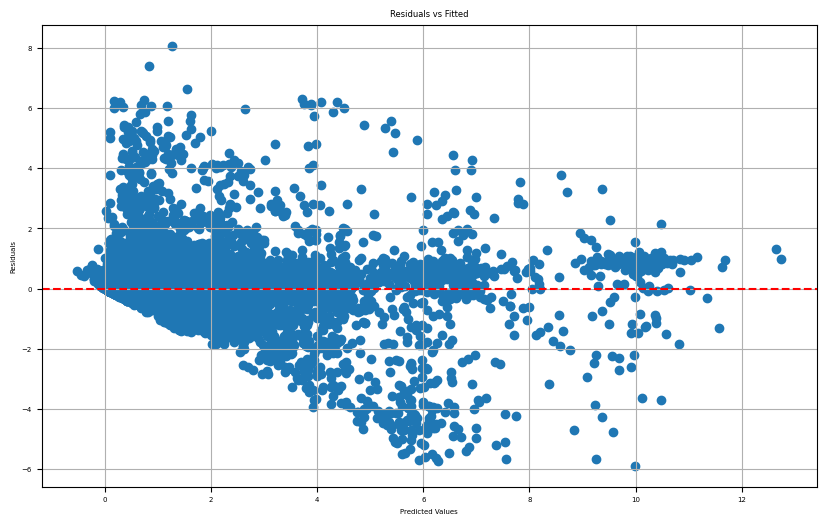

In [188]:
# 잔차 계산
residuals = y_test - elastic_predicted_value

# 잔차 시각화
plt.figure(figsize=(10, 6))
plt.scatter(elastic_predicted_value, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.grid(True)
plt.show()

# 데이터의 선형성을 만족시키기 위해 데이터 변환이 필요함

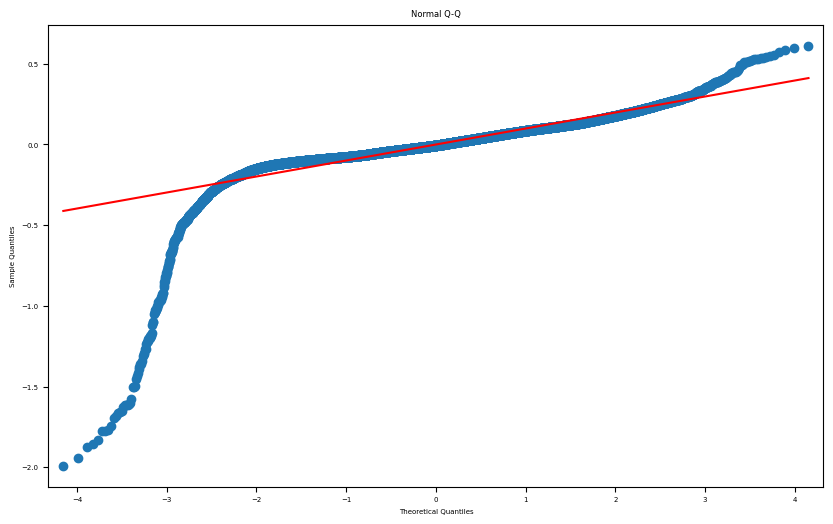

In [181]:
import statsmodels.api as sm

# Q-Q Plot (잔차의 정규성)
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Normal Q-Q')
plt.show()

# 정규성을 만족하기 위해 이상치 처리 및 정규화 필요함

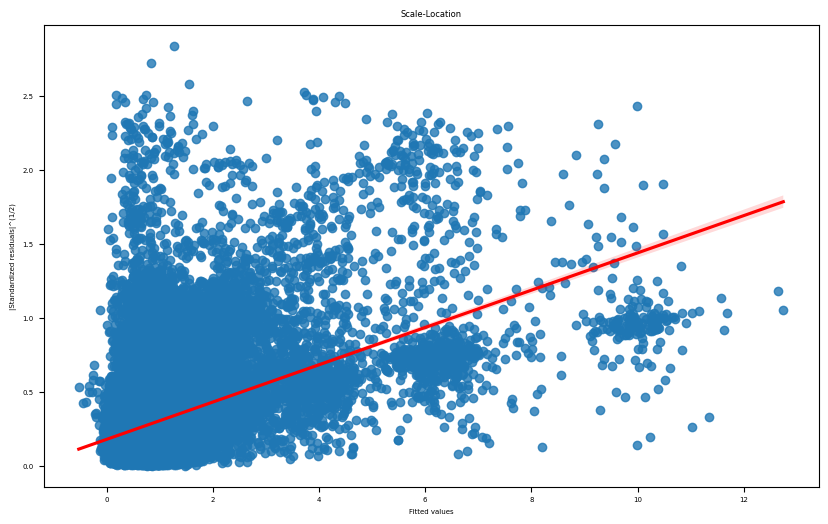

In [190]:
import seaborn as sns
# Scale-Location (잔차의 등분산성)
plt.figure(figsize=(10, 6))
sns.regplot(x=linear_predicted_value, y=np.sqrt(np.abs(residuals)), line_kws={'color': 'red'})
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('|Standardized residuals|^(1/2)')
plt.show()
